In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
config = {
    'domain': 'spouse',
    'postgres': True,
    'debug': True
}

In [3]:
# Get DB connection string and add to globals
# NOTE: $SNORKELDB must be set before any snorkel imports
import os

default_db_name = 'babble_' + config['domain'] + ('_debug' if config['debug'] else '')
DB_NAME = getattr(config, 'db_name', default_db_name)
if 'postgres' in config and config['postgres']:
    DB_TYPE = 'postgres'
else:
    DB_TYPE = 'sqlite'
    DB_NAME += '.db'
DB_ADDR = "localhost:{0}".format(config['db_port']) if 'db_port' in config else ""
os.environ['SNORKELDB'] = '{0}://{1}/{2}'.format(DB_TYPE, DB_ADDR, DB_NAME)
print("$SNORKELDB = {0}".format(os.environ['SNORKELDB']))

$SNORKELDB = postgres:///babble_spouse_debug


In [4]:
from snorkel import SnorkelSession
session = SnorkelSession()

# Resolve config conflicts (nb_config > local_config > global_config)
from snorkel.contrib.babble.pipelines import merge_configs, get_local_pipeline
config = merge_configs(config)

if config['debug']:
    print("NOTE: --debug=True: modifying parameters...")
    config['max_docs'] = 100
    config['gen_model_search_space'] = 2
    config['disc_model_search_space'] = 2
    config['gen-params-default']['epochs'] = 25
    config['disc-params-default']['n_epochs'] = 5

from snorkel.models import candidate_subclass
candidate_class = candidate_subclass(config['candidate_name'], config['candidate_entities'])

pipeline = get_local_pipeline(config['domain'])
pipe = pipeline(session, candidate_class, config)

NOTE: --debug=True: modifying parameters...


In [5]:
# pipe.parse()

In [6]:
# pipe.extract()

In [7]:
# pipe.load_gold()

In [8]:
# pipe.collect()

In [9]:
# pipe.label()

Using L_train: <843x8 sparse matrix of type '<type 'numpy.int64'>'
	with 2364 stored elements in Compressed Sparse Row format>
Using L_dev: <62x8 sparse matrix of type '<type 'numpy.int64'>'
	with 173 stored elements in Compressed Sparse Row format>
Using L_test: <75x8 sparse matrix of type '<type 'numpy.int64'>'
	with 219 stored elements in Compressed Sparse Row format>
[1] Testing init_class_prior = -1.00e+00, step_size = 1.00e-02, reg_param = 1.00e-02, LF_acc_prior_weights = None, LF_acc_prior_weight_default = 1.00e+00
Inferred cardinality: 2
[GenerativeModel] F-1 Score: 0.0
[GenerativeModel] Model saved as <GenerativeModel_0>.
[2] Testing init_class_prior = -1.00e+00, step_size = 1.00e-05, reg_param = 0.00e+00, LF_acc_prior_weights = None, LF_acc_prior_weight_default = 1.00e+00
Inferred cardinality: 2
[GenerativeModel] F-1 Score: 0.545454545455
[GenerativeModel] Model saved as <GenerativeModel_1>.
[GenerativeModel] Model <GenerativeModel_1> loaded.
   init_class_prior  step_size  r

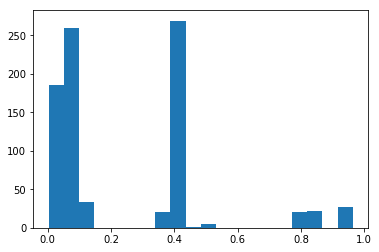

In [10]:
pipe.supervise()

In [11]:
pipe.classify(config)

[1] Testing dim = 50, dropout = 2.50e-01, rebalance = 2.50e-01, lr = 1.00e-03


/Users/bradenjh/repos/snorkel/snorkel/learning/disc_models/rnn/rnn_base.py:34: UserWarning: Candidate 116 has argument past max length for model:	[arg ends at index 136; max len 100]
  warnings.warn('\t'.join([w.format(i), info]))
/Users/bradenjh/repos/snorkel/snorkel/learning/disc_models/rnn/rnn_base.py:35: UserWarning: Additional warnings of this nature will be suppressed.
  warnings.warn('Additional warnings of this nature will be suppressed.')
/Users/bradenjh/anaconda/envs/snorkel/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=280  #epochs=5  batch size=128
[reRNN] Epoch 0 (0.72s)	Average loss=0.692205	Dev F1=0.00
[reRNN] Epoch 1 (1.53s)	Average loss=0.686920	Dev F1=0.00
[reRNN] Epoch 2 (2.32s)	Average loss=0.679299	Dev F1=0.00
[reRNN] Epoch 3 (3.06s)	Average loss=0.672750	Dev F1=0.00
[reRNN] Epoch 4 (3.74s)	Average loss=0.659548	Dev F1=0.00
[reRNN] Training done (3.79s)
[reRNN] F-1.0 Score: 0.0


/Users/bradenjh/repos/snorkel/snorkel/learning/disc_models/rnn/rnn_base.py:34: UserWarning: Candidate 45 has argument past max length for model:	[arg ends at index 199; max len 100]
  warnings.warn('\t'.join([w.format(i), info]))


[reRNN] Model saved as <reRNN_0>
[2] Testing dim = 100, dropout = 1.00e-01, rebalance = 2.50e-01, lr = 1.00e-03
[reRNN] Training model
[reRNN] n_train=280  #epochs=5  batch size=128
[reRNN] Epoch 0 (1.22s)	Average loss=0.689455	Dev F1=0.00
[reRNN] Epoch 1 (2.45s)	Average loss=0.675914	Dev F1=0.00
[reRNN] Epoch 2 (3.54s)	Average loss=0.651022	Dev F1=0.00
[reRNN] Epoch 3 (4.66s)	Average loss=0.618968	Dev F1=0.00
[reRNN] Epoch 4 (5.84s)	Average loss=0.619171	Dev F1=0.00
[reRNN] Training done (5.93s)
[reRNN] F-1.0 Score: 0.0
[reRNN] Loaded model <reRNN_0>
   dim  dropout  rebalance     lr  Prec.  Rec.  F-1.0
0   50     0.25       0.25  0.001    0.0   0.0    0.0
1  100     0.10       0.25  0.001    0.0   0.0    0.0
[reRNN] Model saved as <discriminative_spouse>
### [7.2] Evaluate generative model
### Done in 0.0s.

### [7.3] Evaluate discriminative model
### Done in 0.3s.

      Coverage  F1 Score  Precision    Recall
Disc       1.0  0.000000        0.0  0.000000
Gen        1.0  0.727273   

/Users/bradenjh/repos/snorkel/snorkel/learning/disc_models/rnn/rnn_base.py:34: UserWarning: Candidate 38 has argument past max length for model:	[arg ends at index 103; max len 100]
  warnings.warn('\t'.join([w.format(i), info]))
